In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/tweets_clean.csv")
df.head()


,text,airline_sentiment,airline,tweet_created,clean_text,sentiment_score
0,@VirginAmerica What @dhepburn said.,neutral,Virgin America,2015-02-24 11:35:52 -0800,said,0
1,@VirginAmerica plus you've added commercials t...,positive,Virgin America,2015-02-24 11:15:59 -0800,plus youve added commercials experience tacky,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Virgin America,2015-02-24 11:15:48 -0800,didnt today must mean need take another trip,0
3,@VirginAmerica it's really aggressive to blast...,negative,Virgin America,2015-02-24 11:15:36 -0800,really aggressive blast obnoxious entertainmen...,-1
4,@VirginAmerica and it's a really big bad thing...,negative,Virgin America,2015-02-24 11:14:45 -0800,really big bad thing,-1


In [49]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)   # remove links
    text = re.sub(r"@\S+", "", text)             # remove mentions
    text = re.sub(r"#\S+", "", text)             # remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)      # remove punctuation/numbers
    text = text.lower()                          # lowercase
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saadu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Load the raw dataset
df = pd.read_csv("../data/processed/tweets_clean.csv")


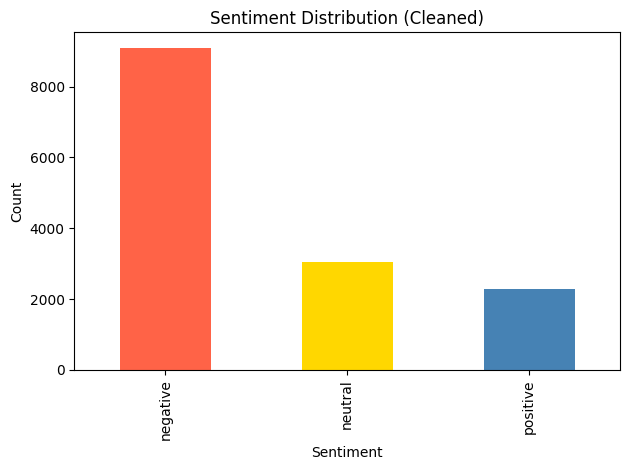

In [51]:
df['airline_sentiment'].value_counts().plot(kind='bar', color=['tomato','gold','steelblue'])
plt.title('Sentiment Distribution (Cleaned)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


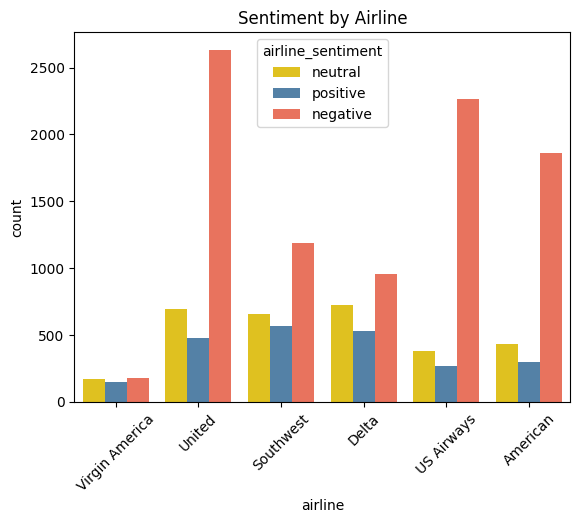

In [52]:
import seaborn as sns

sns.countplot(x="airline", hue="airline_sentiment", data=df,
              palette={"negative":"tomato","neutral":"gold","positive":"steelblue"})
plt.title("Sentiment by Airline")
plt.xticks(rotation=45)
plt.show()


In [53]:
print(df.columns)
# Ensure clean_text has no NaN and is string type
df['clean_text'] = df['clean_text'].fillna("").astype(str)


Index(['text', 'airline_sentiment', 'airline', 'tweet_created', 'clean_text',
       'sentiment_score'],
      dtype='object')


In [54]:
from collections import Counter

all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))


[('flight', 3824), ('get', 1328), ('cancelled', 1026), ('thanks', 1025), ('service', 946), ('help', 828), ('time', 762), ('im', 756), ('customer', 737), ('us', 697), ('hours', 670), ('amp', 635), ('flights', 635), ('hold', 632), ('plane', 619), ('thank', 575), ('cant', 573), ('still', 566), ('one', 556), ('please', 550)]


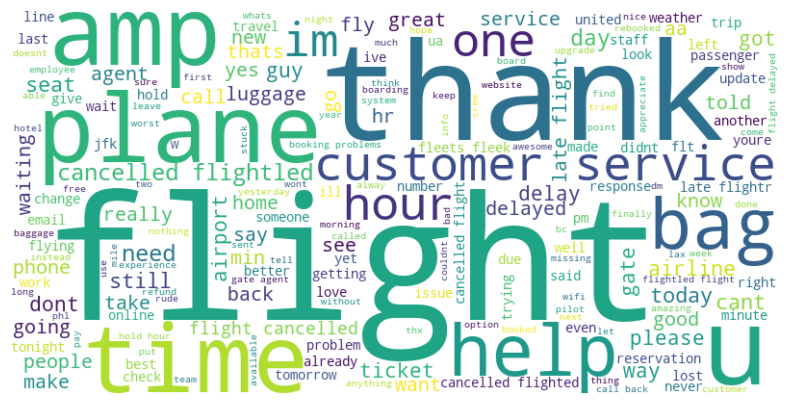

In [55]:
from wordcloud import WordCloud

text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


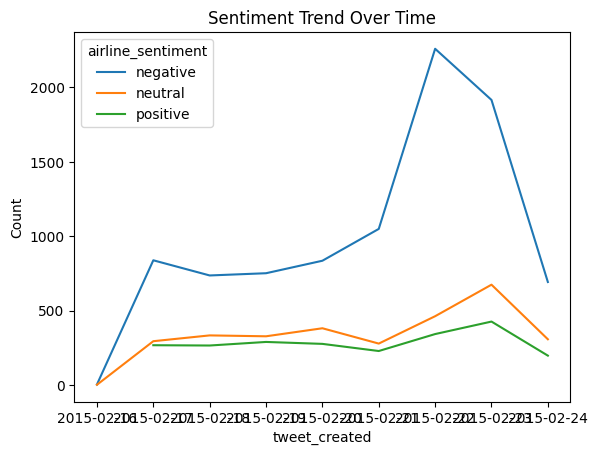

In [56]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df.groupby(df['tweet_created'].dt.date)['airline_sentiment'].value_counts().unstack().plot(kind='line')
plt.title("Sentiment Trend Over Time")
plt.ylabel("Count")
plt.show()
